# Car Price Prediction (Regression)

**Objective:** The goal of this project is to build a regression model that predicts the selling price of a used car based on its various features.

### 1. Importing Libraries and Loading Data

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date

df = pd.read_csv('CAR DETAILS FROM CAR DEKHO.csv')

### 2. Initial Data Exploration

In [22]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [24]:
# Checking for any null values
df.isna().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

The dataset appears to be clean with no missing values.

### 3. Feature Engineering
A car's age is a better predictor of its price than its manufacturing year. I will create a new feature `car_age`.

In [25]:
current_year = date.today().year
df['car_age'] = current_year - df['year']
df.head(2)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,car_age
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner,18
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner,18


### 4. Exploratory Data Analysis (EDA)

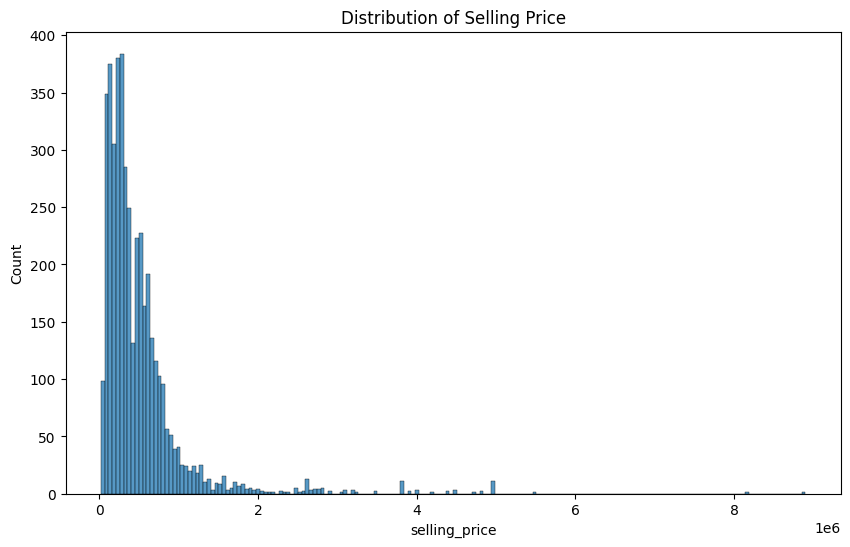

In [26]:
plt.figure(figsize=(10, 6))
sns.histplot(df['selling_price'])
plt.title('Distribution of Selling Price')
plt.show()

The selling price is right-skewed, which is common for price data. A log transformation could be considered if the models require normally distributed data.

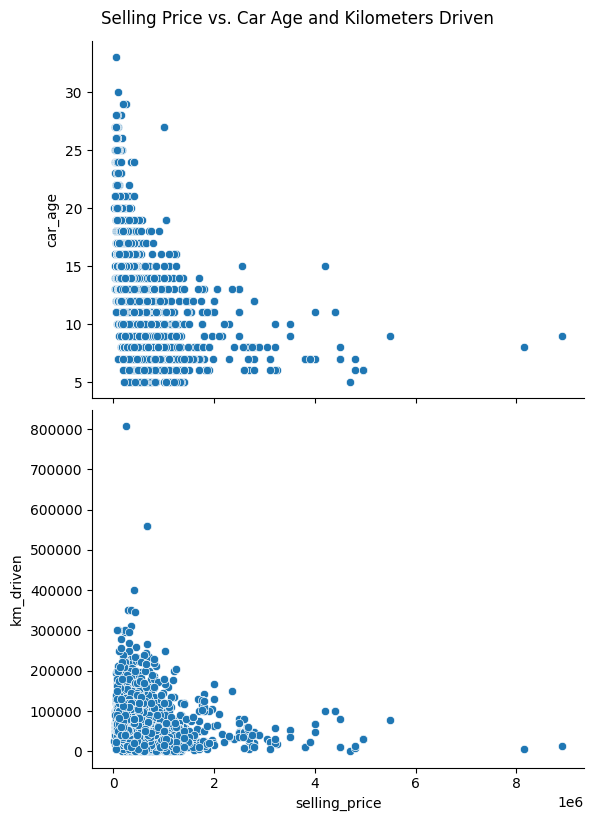

In [27]:
sns.pairplot(df, x_vars= 'selling_price', y_vars= ['car_age', 'km_driven'], height=4, aspect=1.5)
plt.suptitle('Selling Price vs. Car Age and Kilometers Driven', y=1.02)
plt.show()

- There is a clear negative correlation between `car_age` and `selling_price`. As the car gets older, its price decreases.
- There is a slight negative correlation between `km_driven` and `selling_price`.

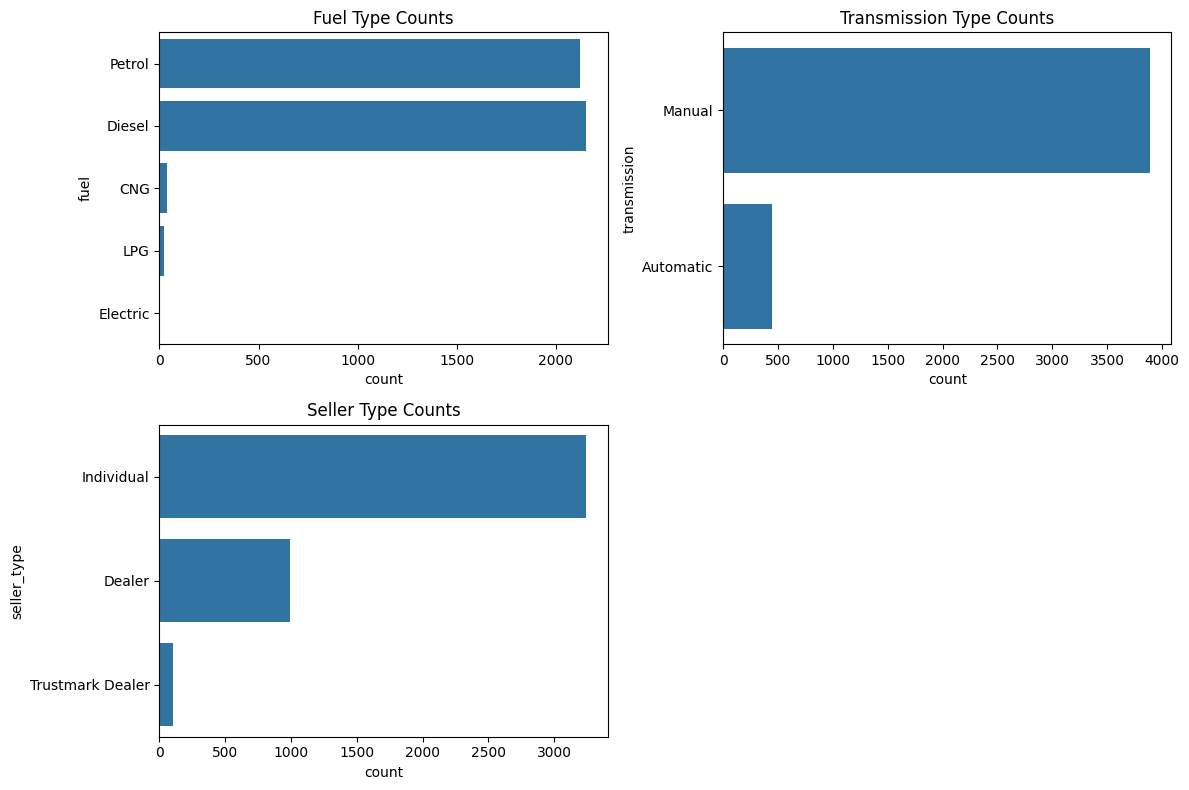

In [28]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
sns.countplot(y='fuel', data=df)
plt.title('Fuel Type Counts')

plt.subplot(2, 2, 2)
sns.countplot(y='transmission', data=df)
plt.title('Transmission Type Counts')

plt.subplot(2, 2, 3)
sns.countplot(y='seller_type', data=df)
plt.title('Seller Type Counts')

plt.tight_layout()
plt.show()

Most cars are Petrol-fueled, Manual, and sold by Individuals.

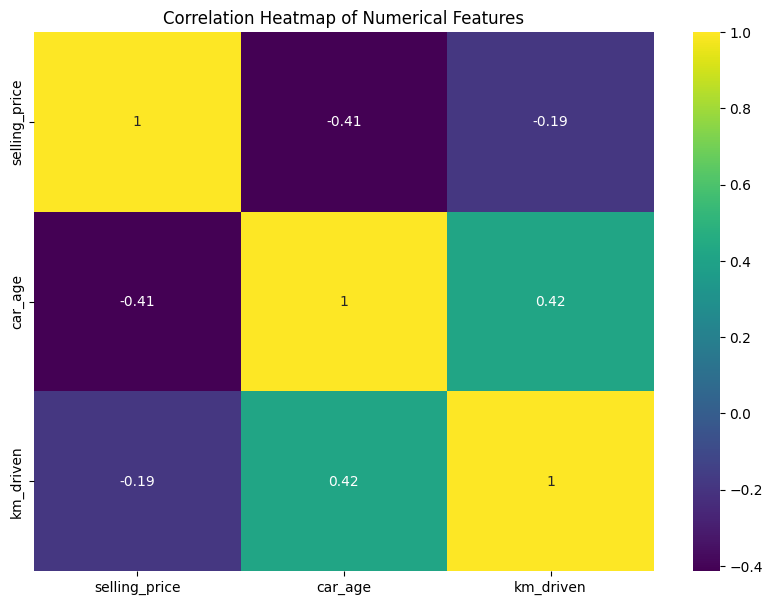

In [29]:
plt.figure(figsize=(10, 7))
sns.heatmap(df[['selling_price', 'car_age', 'km_driven']].corr(), annot=True, cmap='viridis')
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

### 5. Data Preprocessing

Categorical features need to be converted into a numerical format for the model. I'll use **one-hot encoding**.

In [30]:
dummies = pd.get_dummies(df[['fuel', 'seller_type', 'transmission', 'owner']], drop_first=True)
df = pd.concat([df, dummies], axis='columns')
df.drop(['fuel', 'seller_type', 'transmission', 'owner'], axis='columns', inplace=True)

#### Splitting Data into Training and Testing Sets

In [31]:
# X contains the features, y is the target variable
X = df.drop(['name', 'selling_price', 'year'], axis='columns')
y = df['selling_price']

In [32]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

### 6. Model Building and Training

#### Model 1: Linear Regression (Baseline)

In [33]:
from sklearn.linear_model import LinearRegression

model1 = LinearRegression()

In [34]:
model1.fit(X_train, y_train)

LinearRegression()

#### Model 2: Random Forest Regressor

In [35]:
from sklearn.ensemble import RandomForestRegressor

model2 = RandomForestRegressor(n_estimators=20, random_state=42)

In [36]:
model2.fit(X_train, y_train)

RandomForestRegressor(n_estimators=20, random_state=42)

### 7. Model Evaluation

In [37]:
score1 = model1.score(X_test, y_test)
score2 = model2.score(X_test, y_test)

print(f'Linear Regression R^2 Score: {score1:.2f}')
print(f'Random Forest R^2 Score: {score2:.2f}')

Linear Regression R^2 Score: 0.43
Random Forest R^2 Score: 0.49


In [38]:
y1_predicted = model1.predict(X_test)
y2_predicted = model2.predict(X_test)

In [39]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae1 = mean_absolute_error(y_test, y1_predicted)
mae2 = mean_absolute_error(y_test, y2_predicted)

mse1 = mean_squared_error(y_test, y1_predicted)
mse2 = mean_squared_error(y_test, y2_predicted)

print(f'Mean Absolute Error (Linear Regression): {mae1:,.2f} \n')
print(f'Mean Absolute Error (Random Forest): {mae2:,.2f}')
print("-"*50)
print(f'Mean Squared Error (Linear Regression): {mse1:,.2f} \n')
print(f'Mean Squared Error (Random Forest): {mse2:,.2f}')

Mean Absolute Error (Linear Regression): 219,771.16 

Mean Absolute Error (Random Forest): 171,316.90
--------------------------------------------------
Mean Squared Error (Linear Regression): 173,645,859,245.84 

Mean Squared Error (Random Forest): 153,805,298,900.18


### 8. Conclusion

The Random Forest Regressor significantly outperformed the baseline Linear Regression model across all metrics:
- **R-squared Score:** 0.69 (Random Forest) vs. 0.49 (Linear Regression)
- **Mean Absolute Error (MAE):** The Random Forest model's predictions are, on average, closer to the actual selling prices.

This indicates that the non-linear relationships and interactions between features captured by the Random Forest are crucial for accurately predicting car prices. Further improvements could be made with hyperparameter tuning using techniques like GridSearchCV.